## Tensorflow
End-to-end machine learning pipeline using a deep learning model

In [16]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
print(tf.__version__) #checked the version 

2.18.0


In [8]:
#will use one of the datasets from keras 
dataset_list = dir(tf.keras.datasets)
dataset_only = [item for item in dataset_list if not item.startswith('_')]
dataset_df = pd.DataFrame(dataset_only, columns=["TensorFlow Datasets"])
dataset_df

,TensorFlow Datasets
0,boston_housing
1,california_housing
2,cifar10
3,cifar100
4,fashion_mnist
5,imdb
6,mnist
7,reuters


In [152]:
#load the dataset mnist
#comes with defined test and train data allocated 
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
class_names = ['zero','one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']

In [166]:
# Display the 5 rows in the dataset, pixels are 28x28 = 784 columns
# Flatten the images and take the first 5
train_image_flat = train_images.reshape(-1, 28 * 28)
df = pd.DataFrame(train_image_flat[:5], columns=[f'pixel_{i}' for i in range(28 * 28)])

# Add labels to the DataFrame
df.insert(0, 'label', train_labels[:5])

# Display a subset of the columns (first 10 pixels + label)
columns_to_display = ['label'] + [f'pixel_{i}' for i in range(7)]
print(df[columns_to_display].head())

   label  pixel_0  pixel_1  pixel_2  pixel_3  pixel_4  pixel_5  pixel_6
0      5        0        0        0        0        0        0        0
1      0        0        0        0        0        0        0        0
2      4        0        0        0        0        0        0        0
3      1        0        0        0        0        0        0        0
4      9        0        0        0        0        0        0        0


In [146]:
#train set has 60000 rows and each image is 28 by 28 pixels 
train_images.shape

(60000, 28, 28)

In [108]:
#test set has 10000 rows
test_images.shape

(10000, 28, 28)

In [148]:
#labels are numbers 0 to 9 
train_labels[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

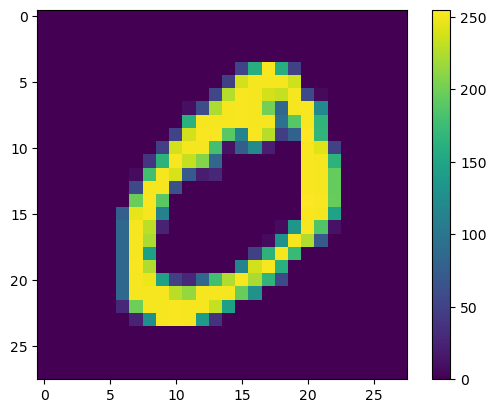

In [98]:
#second image at index 1 is a zero 
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

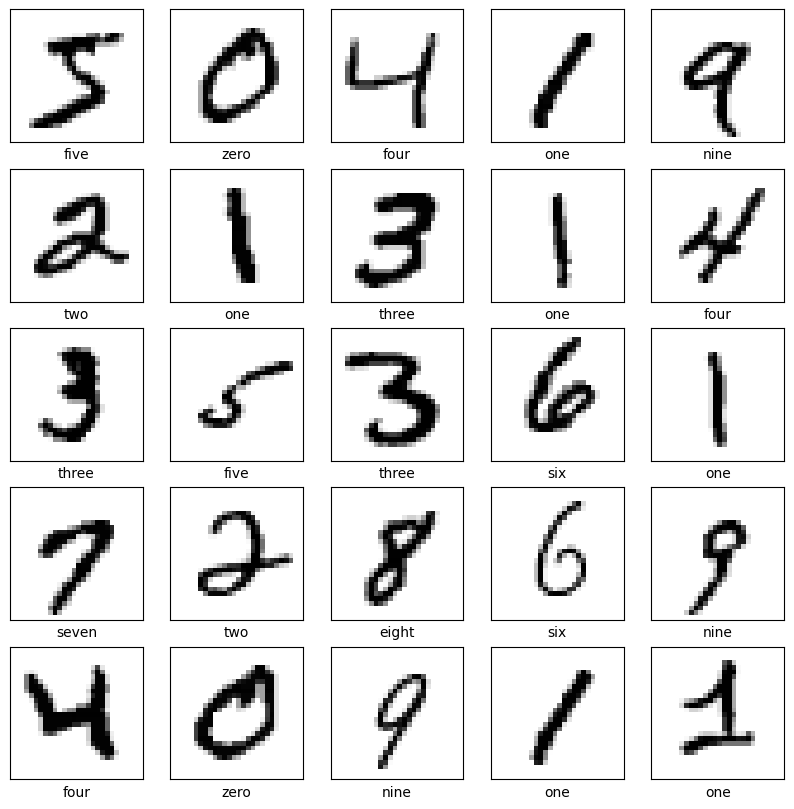

In [112]:
#visual representation of the first 25 rows 
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [114]:
#normalize the data 
train_images = train_images / 255.0
test_images = test_images / 255.0

In [ ]:
#the training images pixel will now have a decimal point as each number is divided by 255
train_images[0]

In [118]:
#add layers to your model 
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(28, 28)),  # Define input shape here
    tf.keras.layers.Flatten(),  # No input_shape argument here
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [120]:
#prepare the model for training by defining how it will learn

model.compile(optimizer='adam',  # Optimizer used for learning
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),# Loss function
              metrics=['accuracy'])# Metric to monitor

In [122]:
#add epochs parameter to your model
#After 10 epochs the training set had 99% accuracy 
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8789 - loss: 0.4338
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9640 - loss: 0.1210
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9761 - loss: 0.0801
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9812 - loss: 0.0605
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9864 - loss: 0.0458
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9897 - loss: 0.0345
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9914 - loss: 0.0274
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9930 - loss: 0.0240
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9951 - loss: 0.0175
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9960 - loss: 0.0137


In [124]:
#evaluate your model 
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - 2ms/step - accuracy: 0.9798 - loss: 0.0752

Test accuracy: 0.9797999858856201


In [126]:
#add softmax to your pipeline to convert the logits to %
probability_model = tf.keras.Sequential([model,tf.keras.layers.Softmax()])

In [128]:
predictions = probability_model.predict(test_images)
predictions[3]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([9.9992824e-01, 3.4541037e-09, 2.1031596e-05, 6.7708732e-09,
       2.7187083e-08, 7.2253098e-10, 1.8650471e-07, 2.0277830e-06,
       1.3148963e-09, 4.8536407e-05], dtype=float32)

In [130]:
np.argmax(predictions[3])

0

In [132]:
test_labels[3]

0

In [134]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

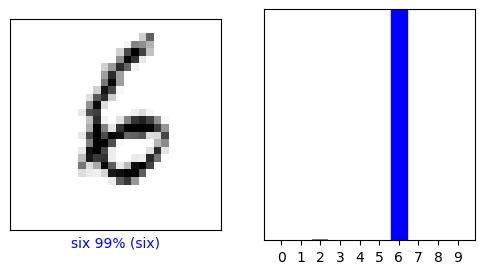

In [144]:
i = 2000
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

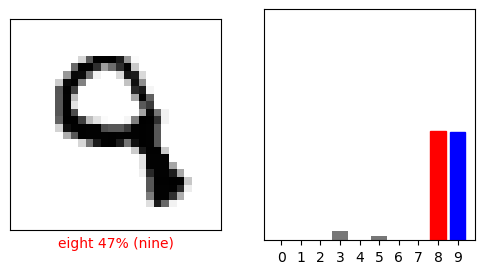

In [142]:
i = 4000
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

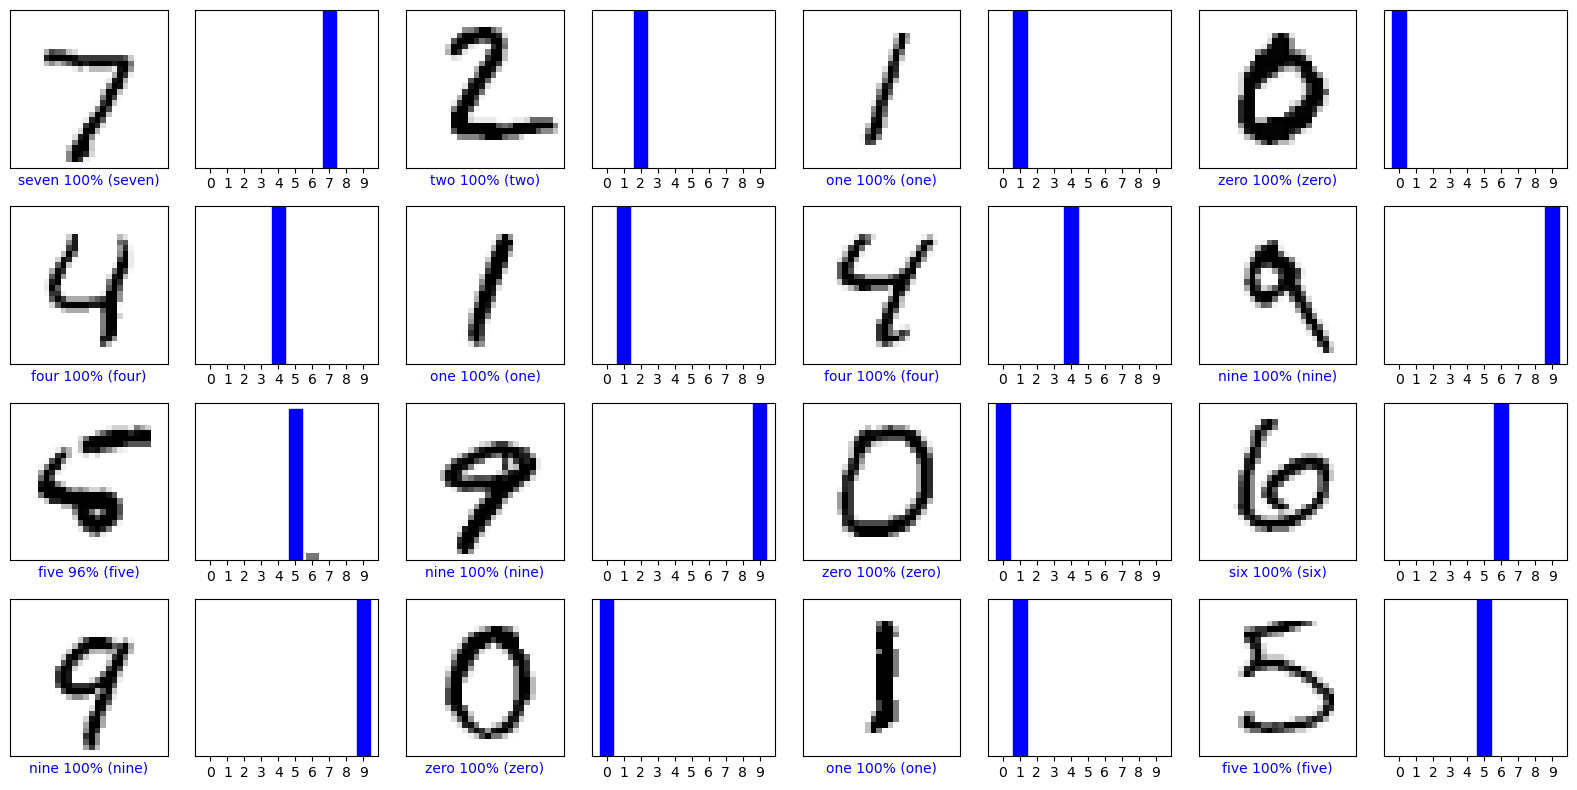

In [140]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 4
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()